In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
from datetime import datetime

* Setting up ability to import functions from src folder

In [2]:
sys.path.insert(
    0, "/home/cameronwills/ddimil12/projects/midterm/gtd_exploration")

In [3]:
from src import clean_data as cd

* Reads in the full_data csv
* Sets low_memory to false to better interpret the values in the columns, since there is a lot of mixed data types in the csv

In [4]:
world_df = pd.read_csv("../data/full_data.csv", index_col=0, low_memory=False)

* Makes a copy of the original df, with only the United States data

In [5]:
usa_df = world_df[world_df["country_txt"] == "United States"].copy()

* Creates a new column 'date' that is of data type datetime

In [7]:
usa_df["date"] = cd.create_date_column(usa_df)

* Top 5 terrorist groups that attack the US

In [15]:
top_5_groups = usa_df.groupby("gname")["gname"].count().sort_values(ascending=False).iloc[:5]

<Axes: title={'center': 'Top 5 groups that attack the most (1970 - 2020)'}, xlabel='count', ylabel='group name'>

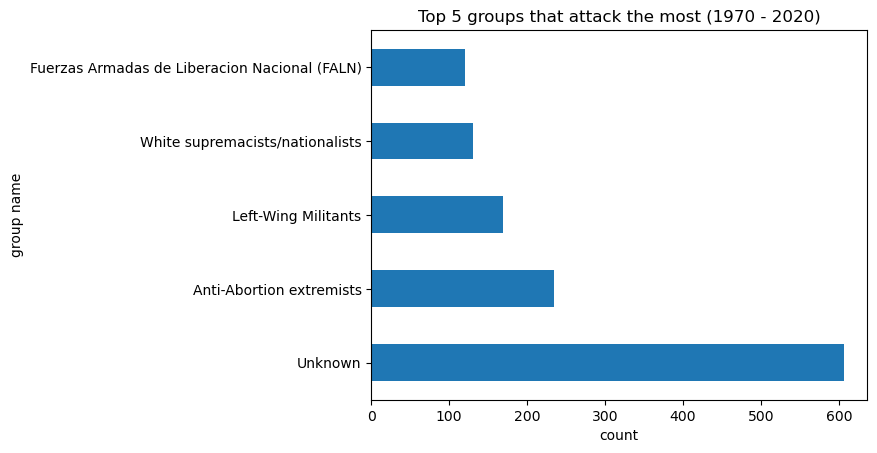

In [21]:
top_5_groups.plot.barh(title="Top 5 groups that attack the most (1970 - 2020)",
                       ylabel="group name", xlabel="count")

* Timeline for each group

In [43]:
groups = top_5_groups.index.values
query = usa_df["gname"].isin(groups)
top_5_df = usa_df[query]
top_5_timeline = top_5_df.groupby(["gname", "year"])["year"].count()

In [133]:
colors = plt.get_cmap("tab10").colors

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))

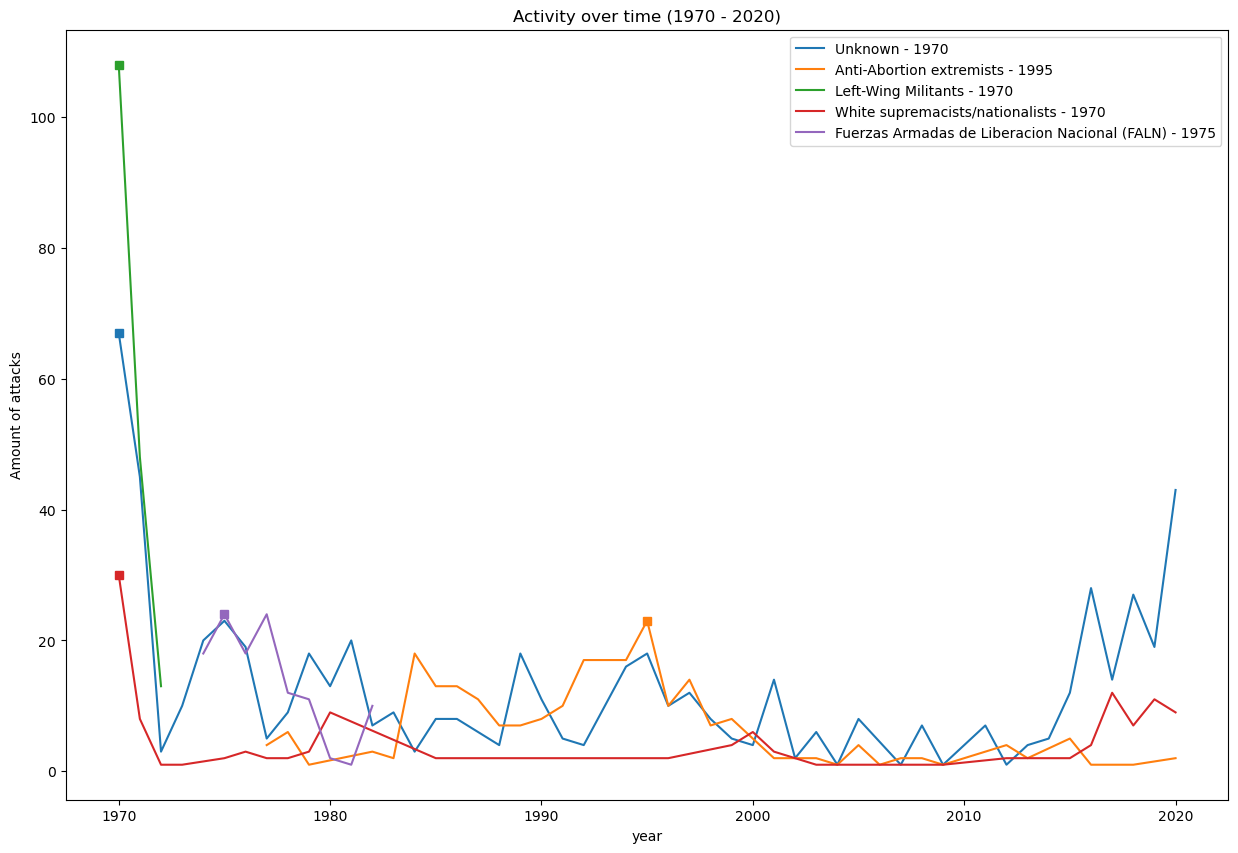

In [146]:
for idx, group in enumerate(groups):
    most_active_year = top_5_timeline[group].idxmax()
    amount_for_most = top_5_timeline[group][most_active_year]
    plt.plot(most_active_year, amount_for_most, marker="s", color=colors[idx])
    top_5_timeline[group].plot.line(legend=True, label=f"{group} - {most_active_year}", 
                                    figsize=(15, 10), title="Activity over time (1970 - 2020)", 
                                    ylabel="Amount of attacks", color=colors[idx])
  